In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
from Haldane_anis_supervise_class import *
from partial import *

In [2]:
L = 5  # number of particles must be odd
keep = [1, 2, 3] # keep the part that we wanna do partial trace over that
bond = 10  # reasonable amount
p = partial(L, keep, bond)

In [3]:
dataset = p.generate_dataset()
partial_density_matrix_train, partial_density_matrix_test = p.partial_density_matrix()
kernel_partial_train = p.gram_train_partial()
kernel_partial_test = p.gram_test_partial()

/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  

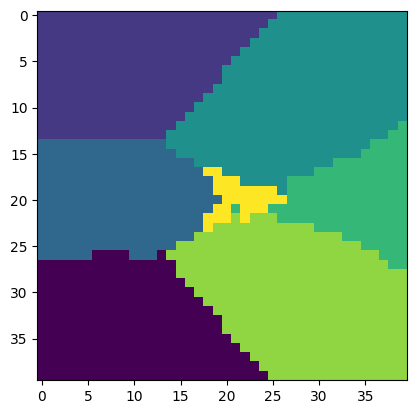

In [4]:
clf = svm.SVC(kernel='precomputed')
kernel_train = kernel_partial_train
kernel_test = kernel_partial_test
y = dataset[0][1]
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))
plt.savefig(f'result for DMRG states with L={L} and bond dimension ={bond}.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for E and D
E = np.arange(-2, 2, 0.1)
D = np.arange(-2, 2, 0.1)

# Lists to store points and targets
lst_points = []
lst_target = []

# Loop through E and D and classify points
for e in E:
    if 0.8 < e < 2:
        lst_points.append([-2, e])
        lst_target.append(1)  # 'large_ex'
    elif -0.8 < e < 0.8:
        lst_points.append([-2, e])
        lst_target.append(3)  # 'z_neel'
    elif -2 < e < -0.8:
        lst_points.append([-2, e])
        lst_target.append(2)  # 'large_ey'


for e in E:
    if -2 < e < -0.4:
        lst_points.append([2, e])
        lst_target.append(4)  # 'x_neel'
    elif -0.4 < e < 0.4:
        lst_points.append([2, e])
        lst_target.append(5)  # 'large_d'
    elif 0.4 < e < 2.0:
        lst_points.append([2.0, e])
        lst_target.append(6)  # 'y_neel'


for d in D:
    if -2 < d < 0.2:
        lst_points.append([d, 2])
        lst_target.append(1)  # 'large_ex'
    elif 0.2 < d < 2.0:
        lst_points.append([d, 2.0])
        lst_target.append(6)  # 'y_neel'

for d in D:
    if -2 < d < 0.2:
        lst_points.append([d, -2])
        lst_target.append(2)  # 'large_ey'
    elif 0.2 < d < 2.0:
        lst_points.append([d, -2])
        lst_target.append(4)  # 'x_neel'

for d in np.arange(-2, -0.5, 0.1):  # Added step size 0.1
    lst_points.append([d, 0.0])
    lst_target.append(3) 

for d in np.arange(0.9, 2, 0.1):
    lst_points.append([d, 0.0])
    lst_target.append(5)  # 'large_d'

for d in np.arange(-0.2, 0.6, 0.1):
    lst_points.append([d, 0.0])
    lst_target.append(7) #'Haldane'


points = np.array(lst_points)
targets = np.array(lst_target)


In [ ]:
plt.scatter(points[:, 0], points[:, 1], c=targets)

plt.xlabel('D')
plt.ylabel('E')
plt.colorbar(label='Target')
plt.title('Phase Diagram')

plt.show()

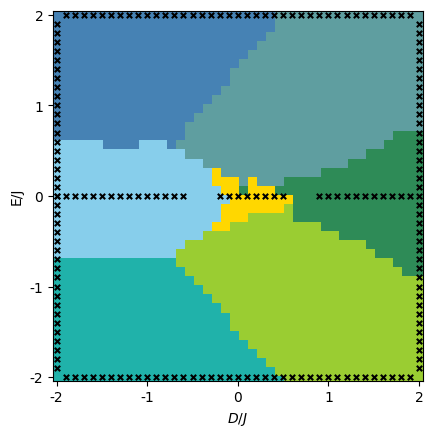

In [45]:
mat = y_pred.reshape(40,40)
r = mat.shape[0]
c = mat.shape[1]
dx = 4/r
dy = 4/c

for j in range(c):
    for i in range(r):
        if mat[j,i] == 1:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color = 'steelblue',s=320, edgecolors='none')
        elif mat[j,i] == 2:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='lightseagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 3:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='skyblue',s =320,  edgecolors='none')
        elif mat[j,i] == 4:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='yellowgreen',s =320,  edgecolors='none')
        elif mat[j,i] == 5:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='seagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 6:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='cadetblue',s =320,  edgecolors='none')
        elif mat[j,i] == 7:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='gold',s =320,  edgecolors='none')

plt.scatter(points[:, 0]+2, points[:, 1]+2, marker='x',color='black', s=15)
plt.gca().set_aspect('equal')
plt.xlim([-0.04,4.04])
plt.ylim([-0.04,4.04])
plt.xticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.yticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.xlabel('$D/J$')
plt.ylabel('E/J')
plt.savefig('anisotropic_Haldan_svm.png')
plt.show()
